In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st

In [2]:
cols = ["VendorID","tpep_pickup_datetime","tpep_dropoff_datetime","passenger_count","payment_type","fare_amount","trip_distance"]
df = pd.read_csv("2020_Yellow_Taxi_Trip_Data.csv",usecols = cols,nrows = 9000000)

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,6.0
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,7.0
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,6.0
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,5.5
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,2.0,3.5


# exploratory data analysis

In [4]:
df.shape

(9000000, 7)

In [5]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
payment_type             float64
fare_amount              float64
dtype: object

In [6]:
ss = df.copy()

In [7]:
ss.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,6.0
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,7.0
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,6.0
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,5.5
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,2.0,3.5


In [8]:
import pandas as pd
ss['tpep_pickup_datetime'] = pd.to_datetime(
    ss['tpep_pickup_datetime'],
    format = "%m/%d/%Y %I:%M:%S %p",
    errors = "coerce"
)
                                           

ss['tpep_dropoff_datetime'] = pd.to_datetime(
    ss['tpep_dropoff_datetime'],
    format = "%m/%d/%Y %I:%M:%S %p",
    errors = "coerce"
)
    
                                           



In [9]:
ss.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,6.0
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,7.0
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,6.0
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,5.5
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,2.0,3.5


In [10]:
ss.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
payment_type                    float64
fare_amount                     float64
dtype: object

In [11]:
ss["duration"] = ss["tpep_dropoff_datetime"] - ss["tpep_pickup_datetime"]


In [12]:
ss["duration"]= ss["duration"].dt.total_seconds()/60

In [13]:
ss["duration"] = ss["duration"].round(2)

In [14]:
ss.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,6.0,4.80
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,7.0,7.42
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,6.0,6.18
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,5.5,4.85
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,2.0,3.5,2.30


# extracting important columns

In [66]:
ss = ss[["passenger_count","payment_type","fare_amount","trip_distance","duration"]]

In [67]:
ss.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,card,6.0,1.20,4.80
1,1,card,7.0,1.20,7.42
2,1,card,6.0,0.60,6.18
3,1,card,5.5,0.80,4.85
5,1,cash,2.5,0.03,0.88


In [17]:
ss.isnull().sum()

passenger_count    84876
payment_type       84876
fare_amount            0
trip_distance          0
duration               0
dtype: int64

# find the percent of mising values

In [18]:
84876/len(ss)

0.009430666666666667

In [19]:
ss.dropna(inplace = True)

In [20]:
ss.isnull().sum()

passenger_count    0
payment_type       0
fare_amount        0
trip_distance      0
duration           0
dtype: int64

In [21]:
ss.shape

(8915124, 5)

In [22]:
ss["passenger_count"] = ss["passenger_count"].astype("int")
ss["payment_type"] = ss["payment_type"].astype("int")

In [23]:
ss.shape

(8915124, 5)

In [24]:
ss[ss.duplicated()].shape

(5055410, 5)

# Droping Duplicate values

In [25]:
ss.drop_duplicates(inplace = True)

In [26]:
ss.shape

(3859714, 5)

# cheaking the distribution for numeric and categorial data 

In [27]:
ss["passenger_count"].value_counts(normalize= True)

passenger_count
1    0.574217
2    0.190681
3    0.067824
5    0.065390
6    0.041535
4    0.036961
0    0.023371
7    0.000010
8    0.000006
9    0.000006
Name: proportion, dtype: float64

In [28]:
ss["payment_type"].value_counts(normalize= True)

payment_type
1    6.788125e-01
2    3.061045e-01
3    9.231254e-03
4    5.851470e-03
5    2.590866e-07
Name: proportion, dtype: float64

In [29]:
ss = ss[ss["payment_type"]<3]
ss = ss[(ss["passenger_count"]>0) & (ss["passenger_count"]<6)]

In [30]:
ss.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.2,4.80
1,1,1,7.0,1.2,7.42
2,1,1,6.0,0.6,6.18
3,1,1,5.5,0.8,4.85
4,1,2,3.5,0.0,2.30


In [31]:
ss.shape

(3554379, 5)

In [32]:
ss["payment_type"] = ss["payment_type"].replace([1,2],["card","cash"])

In [33]:
ss.describe()

,passenger_count,fare_amount,trip_distance,duration
count,3.554379e+06,3.554379e+06,3.554379e+06,3.554379e+06
mean,1.752947e+00,1.840343e+01,4.717962e+00,2.533673e+01
std,1.191739e+00,1.521619e+01,4.973685e+00,9.638496e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-9.990670e+03
25%,1.000000e+00,9.000000e+00,1.580000e+00,1.038000e+01
50%,1.000000e+00,1.400000e+01,2.900000e+00,1.643000e+01
75%,2.000000e+00,2.200000e+01,5.800000e+00,2.427000e+01
max,5.000000e+00,4.265000e+03,3.699400e+02,8.525120e+03


# removing the negitive values

In [34]:
ss = ss[ss["fare_amount"]>0]
ss = ss[ss["trip_distance"]>0]
ss = ss[ss["duration"]>0]

# cheaking the outlires

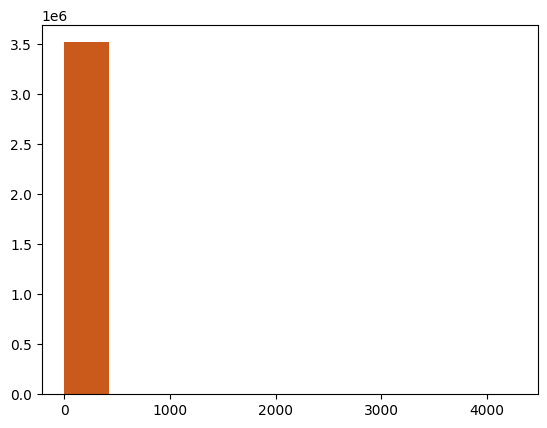

In [35]:
plt.hist(ss["fare_amount"],color = "#CA5A1C")
plt.show()

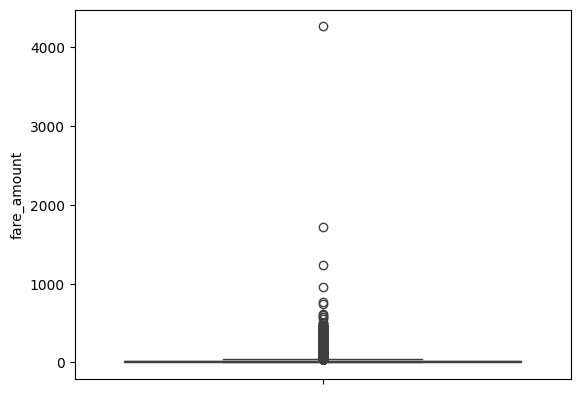

In [36]:
sns.boxplot(ss["fare_amount"])
plt.show()

# we use interquartile range to remove outliers

In [37]:
gf1 = ss.copy()

In [38]:
for col in ["fare_amount","trip_distance","duration"]:
    q1 = gf1[col].quantile(0.25)
    q3 = gf1[col].quantile(0.75)
    iqr = q3-q1

    llowerbound = q1-1.5*iqr
    uppperbound = q3+1.5*iqr
    gf1 = gf1[(gf1[col] >= llowerbound) & (gf1[col] <= uppperbound)]

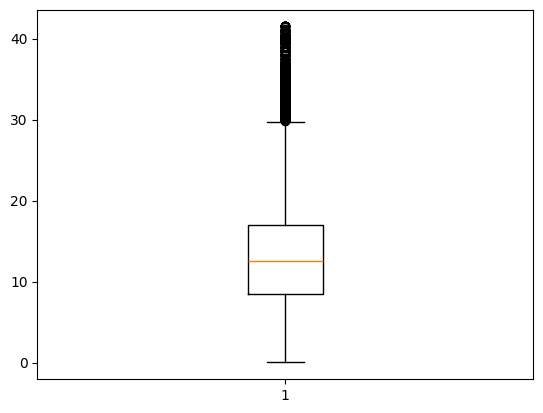

In [39]:
plt.boxplot(gf1["fare_amount"])
plt.show()

In [40]:
cf = gf1.copy()

In [41]:
cf.count()

passenger_count    2964106
payment_type       2964106
fare_amount        2964106
trip_distance      2964106
duration           2964106
dtype: int64

# Distribution of fare amount and trip distance on the basis of payment type

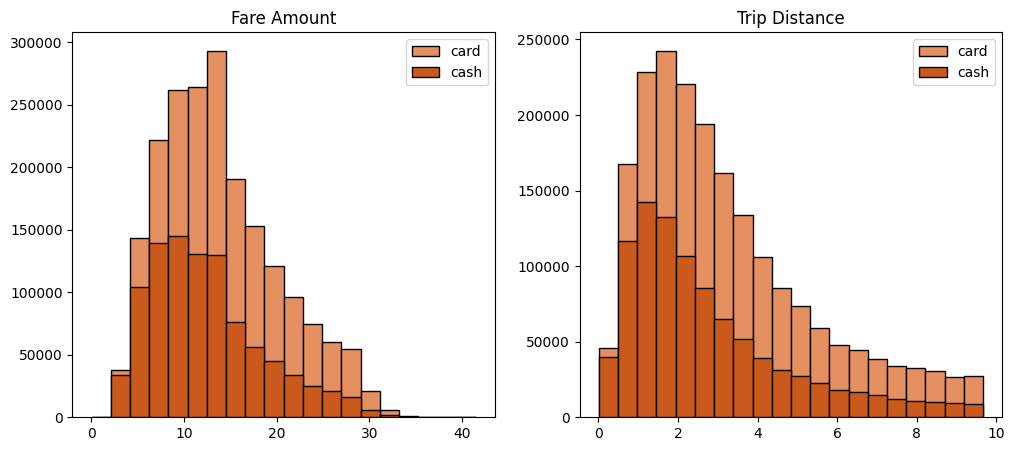

In [65]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)

plt.hist(cf[cf["payment_type"]== "card"]["fare_amount"],bins =20,color = "#E59061",histtype = "barstacked",label = "card",edgecolor = "black")
plt.hist(cf[cf["payment_type"]== "cash"]["fare_amount"],bins =20,color = "#CA5A1C",histtype = "barstacked",label = "cash",edgecolor = "black")
plt.title("Fare Amount")
plt.legend()
plt.subplot(1,2,2)
plt.hist(cf[cf["payment_type"]== "card"]["trip_distance"],color = "#E59061",histtype = "barstacked",bins =20,label = "card",edgecolor = "black")
plt.hist(cf[cf["payment_type"]== "cash"]["trip_distance"],color = "#CA5A1C",histtype = "barstacked",bins =20,label = "cash",edgecolor = "black")

plt.title("Trip Distance")
plt.legend()
plt.show()
           


# mean and standerd deviation of fare amount and trip distance

In [43]:
cf.groupby("payment_type").agg({"fare_amount":["mean","std"],"trip_distance":["mean","std"]})

fare_amount          trip_distance          
                    mean      std          mean       std
payment_type                                             
card           13.879168  6.31275      3.234168  2.188518
cash           12.316709  6.00181      2.780616  2.080957

# Using pie chart to show the proporsion of card and cash users

In [44]:
cf["payment_type"].value_counts()

payment_type
card    2000603
cash     963503
Name: count, dtype: int64

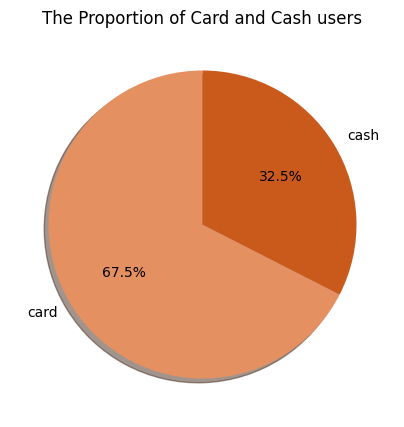

In [69]:
plt.figure(figsize = (12,5))
plt.pie(cf["payment_type"].value_counts(),labels = cf["payment_type"].value_counts().index,
       colors =["#E59061","#CA5A1C"], autopct = "%1.1f%%",startangle = 90,shadow = True)
plt.title("The Proportion of Card and Cash users")
plt.show()

In [46]:
cf.head(2)

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,card,6.0,1.2,4.80
1,1,card,7.0,1.2,7.42


In [47]:
psn_count = cf.groupby(["payment_type","passenger_count"])[["passenger_count"]].sum()

In [48]:
psn_count.rename(columns = {"passenger_count":"count"},inplace = True)

In [49]:
psn_count.reset_index(inplace = True)

In [50]:
psn_count["prc"] = (psn_count["count"]/psn_count["count"].sum())*100

In [51]:
psn_count["count"].sum()

np.int64(5365859)

In [52]:
psn_count["prc"] = psn_count["prc"].round(2)

In [53]:
psn_count.index

RangeIndex(start=0, stop=10, step=1)

# Transpose the data to plot stacked bar plot

In [54]:
dff = pd.DataFrame(columns = ["payment_type",1,2,3,4,5])
dff["payment_type"] = ["card","cash"]
dff.iloc[0,1:] = psn_count.iloc[0:5,-1]
dff.iloc[1,1:] = psn_count.iloc[5:,3]

In [55]:
dff.set_index("payment_type",inplace = True)

In [56]:
dff.index

Index(['card', 'cash'], dtype='object', name='payment_type')

# Percentage distribution in passenger type by payment value

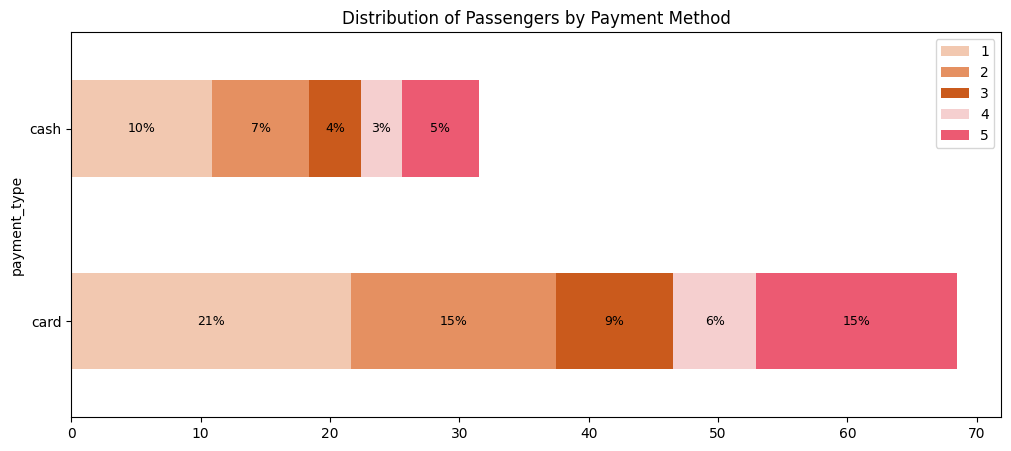

In [70]:
ax = dff.plot(kind="barh",stacked = True,figsize = (12,5),color = ["#F2C8B0","#E59061","#CA5A1C","#F5CFCF","#EC5A72"])
plt.title("Distribution of Passengers by Payment Method")
for container in ax.containers:
    ax.bar_label(container,fmt="%d%%",label_type = "center",fontsize = 9,color = "black") 

plt.show()

# we are cheaking that the data is normally distributed or not 

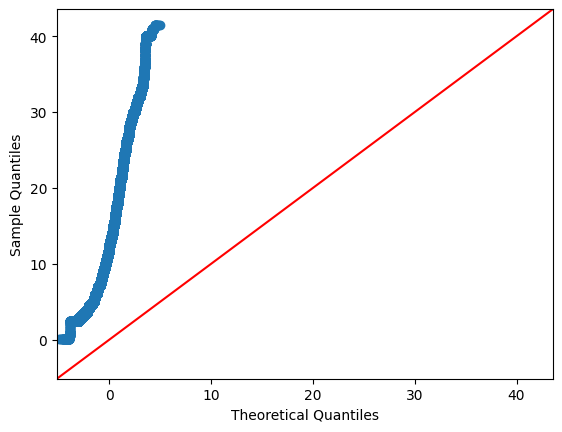

In [58]:
sm.qqplot(cf["fare_amount"],line = "45")
plt.show()

# The data is not normally distributed

# use Ttest for hypotheses testing

In [59]:
card_v = cf[cf["payment_type"] == "card"]["fare_amount"]
cash_v = cf[cf["payment_type"] == "cash"]["fare_amount"]

In [60]:
card_v

0           6.0
1           7.0
2           6.0
3           5.5
9           8.0
           ... 
8999977    24.0
8999986     4.5
8999991    18.5
8999996    14.5
8999997    15.0
Name: fare_amount, Length: 2000603, dtype: float64

In [71]:
ttest,pvalue = st.ttest_ind(a = card_v,b = cash_v ,equal_var = False)
print("T_statistics",ttest.round(2),"P_value",pvalue)

T_statistics 206.4 P_value 0.0


# the null hypothese is reject becouse the pvalue is 0.0 which lesser then significance level = 0.05